1.Iris flower classification

Logistic Regression for Iris Classification

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression


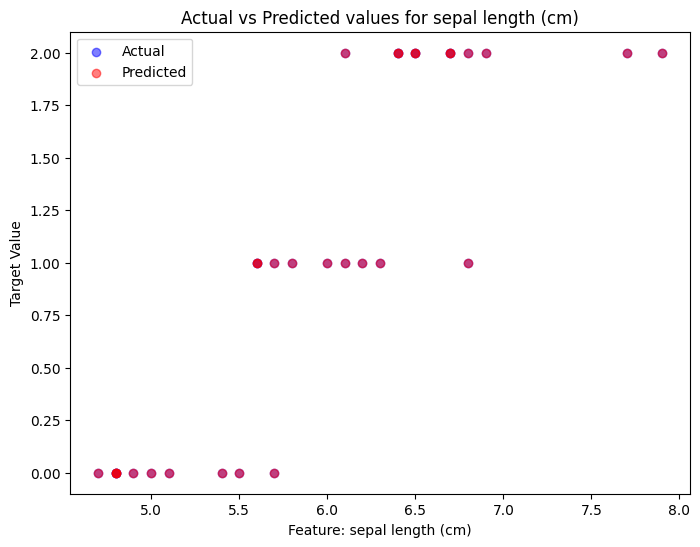

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [63]:
data = load_iris()
X = data.data   
y = data.target 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model=LogisticRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
y_pred

X_feature = X_test[:, 0]  
plt.figure(figsize=(8,6))
plt.scatter(X_feature, y_test, color='blue', alpha=0.5, label="Actual")
plt.scatter(X_feature, y_pred, color='red', alpha=0.5, label="Predicted")
plt.xlabel("Feature: " + data.feature_names[0])
plt.ylabel("Target Value")
plt.title("Actual vs Predicted values for " + data.feature_names[0])
plt.legend()
plt.show()

model.score(X, y)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



Support Vector Machine for Iris Classification

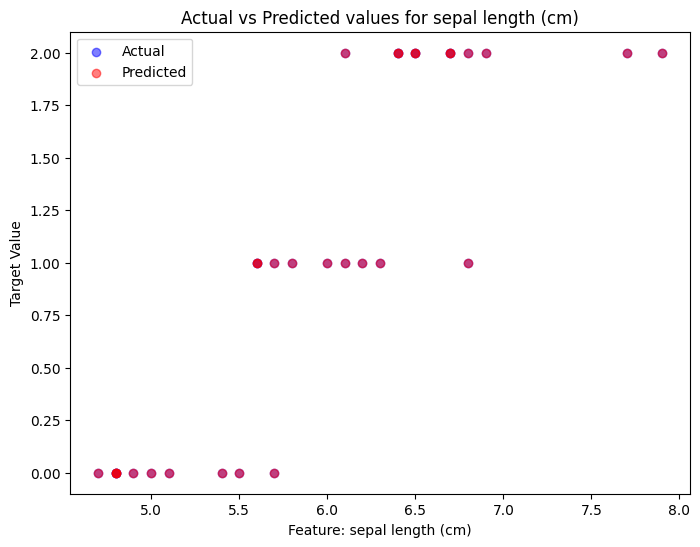

In [64]:
from sklearn import svm
model=svm.LinearSVC()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)


X_feature = X_test[:, 0]

plt.figure(figsize=(8,6))
plt.scatter(X_feature, y_test, color='blue', alpha=0.5, label="Actual")
plt.scatter(X_feature, y_pred, color='red', alpha=0.5, label="Predicted")
plt.xlabel("Feature: " + data.feature_names[0])
plt.ylabel("Target Value")
plt.title("Actual vs Predicted values for " + data.feature_names[0])
plt.legend()
plt.show()



In [65]:
model.score(X_test,y_test)


1.0

KNN for Iris Classification

In [66]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.preprocessing import StandardScaler

In [67]:
model=KNN(n_neighbors=5)
x_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(X_test)

model.fit(X_train_scaled, y_train)
y_pred=model.predict(X_test_scaled)
print(y_pred)

model.score(X_test_scaled,y_test)

accuracy_knn = accuracy_score(y_test, y_pred)
print("KNN Accuracy (with Standardization):", accuracy_knn)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)  # 5-fold CV
print("CV accuracy:", scores.mean())

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
KNN Accuracy (with Standardization): 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
CV accuracy: 0.9733333333333334


Decision Tree for Iris Classification


In [68]:
from sklearn.tree import DecisionTreeClassifier

Decision Tree Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


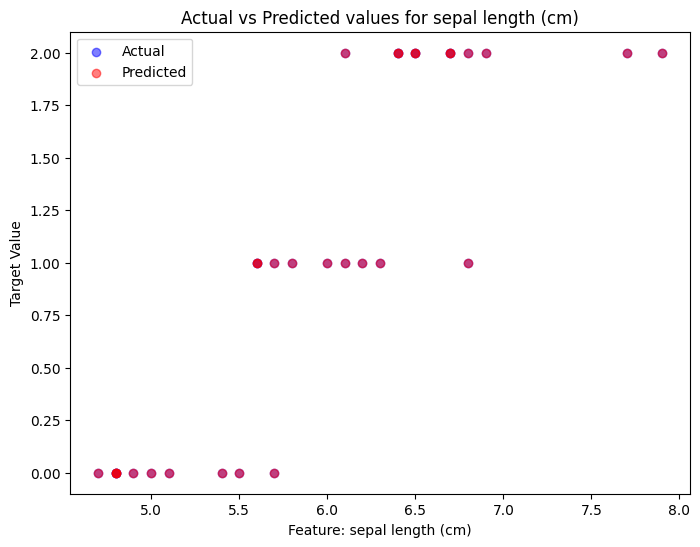

1.0

In [69]:
model=DecisionTreeClassifier(criterion="entropy",random_state=42)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

model.score(X_test, y_test)

accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


X_feature = X_test[:, 0]

plt.figure(figsize=(8,6))
plt.scatter(X_feature, y_test, color='blue', alpha=0.5, label="Actual")
plt.scatter(X_feature, y_pred, color='red', alpha=0.5, label="Predicted")
plt.xlabel("Feature: " + data.feature_names[0])
plt.ylabel("Target Value")
plt.title("Actual vs Predicted values for " + data.feature_names[0])
plt.legend()
plt.show()

model=DecisionTreeClassifier(criterion="gini",random_state=42)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
model.score(X_test, y_test)


2.Handwritten digit recognition with MNIST dataset

In [70]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


Handwritten digit recognition with MNIST dataset


In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

# Build model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train and capture history
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1, verbose=1)

plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.savefig('mnist_accuracy.png')  # Save accuracy plot
plt.close()

plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.savefig('mnist_loss.png')  
plt.close()



d:\HCL\Practice\.conda\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.9195 - loss: 0.2801 - val_accuracy: 0.9625 - val_loss: 0.1337
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9634 - loss: 0.1245 - val_accuracy: 0.9715 - val_loss: 0.0980
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.9739 - loss: 0.0838 - val_accuracy: 0.9742 - val_loss: 0.0917
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9803 - loss: 0.0621 - val_accuracy: 0.9802 - val_loss: 0.0707
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9855 - loss: 0.0472 - val_accuracy: 0.9783 - val_loss: 0.0740


House price prediction with simple linear regression and multiple linear regression

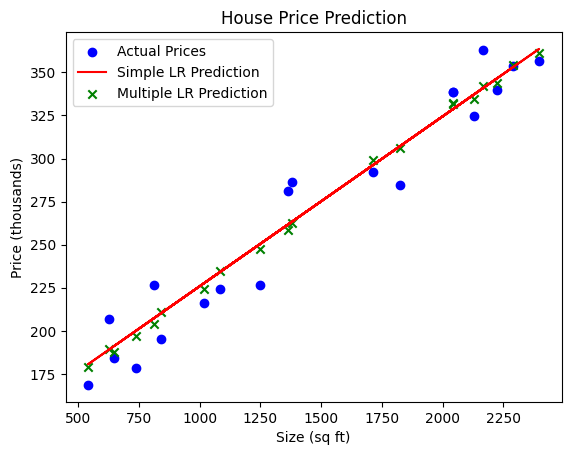

Simple LR R^2: 0.9444
Multiple LR R^2: 0.9485


In [72]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Synthetic data: size (sq ft) and price (in thousands)
np.random.seed(42)
sizes = np.random.rand(100, 1) * 2000 + 500  # 500-2500 sq ft
prices = 100 + 0.1 * sizes + np.random.rand(100, 1) * 50  # Linear relation with noise

# Simple Linear Regression
X_train, X_test, y_train, y_test = train_test_split(sizes, prices, test_size=0.2, random_state=42)
model_simple = LinearRegression()
model_simple.fit(X_train, y_train)
y_pred_simple = model_simple.predict(X_test)

# Multiple Linear Regression (add a second feature: rooms)
rooms = np.random.randint(2, 6, (100, 1))
X_multi = np.hstack((sizes, rooms))
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, prices, test_size=0.2, random_state=42)
model_multi = LinearRegression()
model_multi.fit(X_train_multi, y_train_multi)
y_pred_multi = model_multi.predict(X_test_multi)

# Plot results
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.plot(X_test, y_pred_simple, color='red', label='Simple LR Prediction')
plt.scatter(X_test_multi[:, 0], y_pred_multi, color='green', label='Multiple LR Prediction', marker='x')
plt.title('House Price Prediction')
plt.xlabel('Size (sq ft)')
plt.ylabel('Price (thousands)')
plt.legend()
plt.savefig('house_price_prediction.png')
plt.show()

print(f"Simple LR R^2: {model_simple.score(X_test, y_test):.4f}")
print(f"Multiple LR R^2: {model_multi.score(X_test_multi, y_test_multi):.4f}")

Spam email detection using Naive Bayes classifier

Accuracy: 0.7861020629750272

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       531
           1       0.76      0.72      0.74       390

    accuracy                           0.79       921
   macro avg       0.78      0.78      0.78       921
weighted avg       0.79      0.79      0.79       921


Confusion Matrix:
 [[445  86]
 [111 279]]


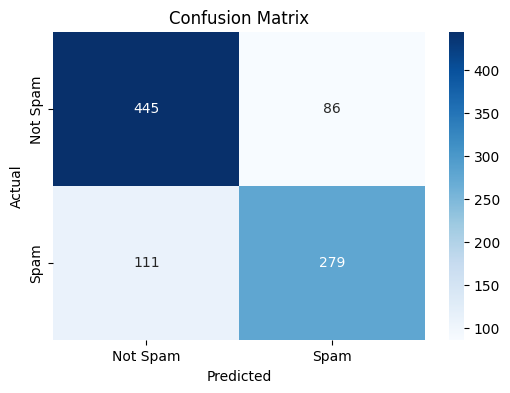

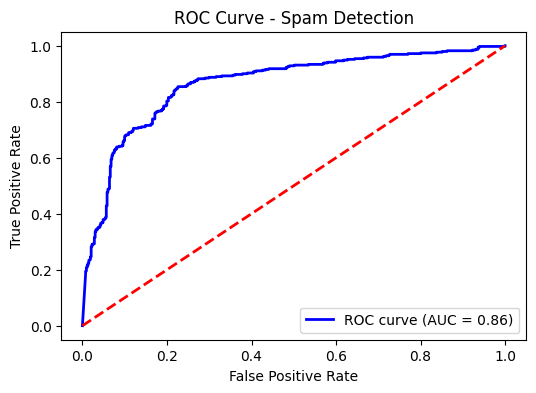

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, roc_curve, auc

column_names = [f'feature_{i}' for i in range(57)] + ['is_spam']
df = pd.read_csv("spambase.data", header=None, names=column_names)

X = df.drop("is_spam", axis=1)
y = df["is_spam"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Not Spam","Spam"], yticklabels=["Not Spam","Spam"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
from sklearn.metrics import roc_curve, auc

# Predict probabilities
y_proba = model.predict_proba(X_test)[:,1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color="blue", lw=2, label="ROC curve (AUC = %0.2f)" % roc_auc)
plt.plot([0,1], [0,1], color="red", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Spam Detection")
plt.legend(loc="lower right")
plt.show()


Titanic survival prediction with data preprocessing



Dataset shape: (891, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8

C:\Program Files\KMSpico\temp\ipykernel_2240\2241221018.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Survived", palette="Set2")


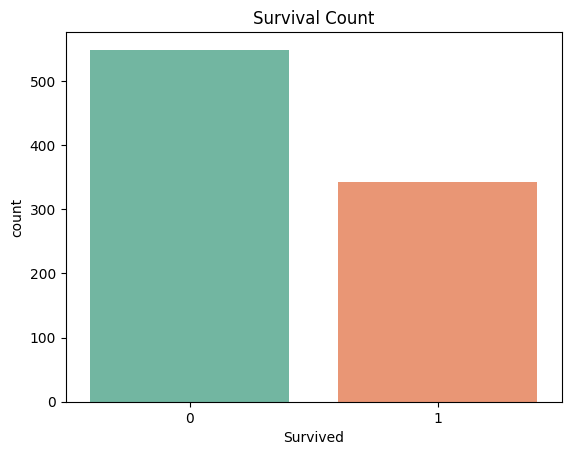

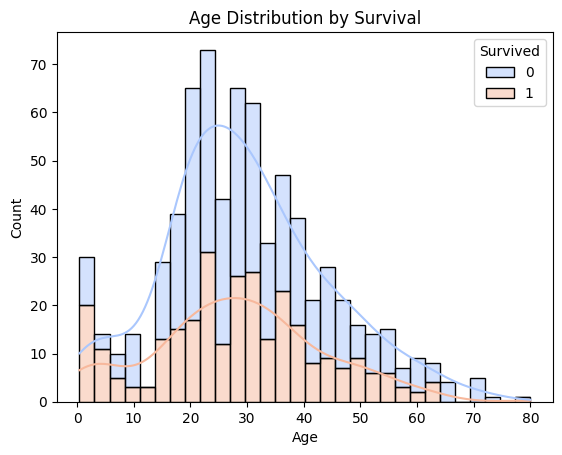

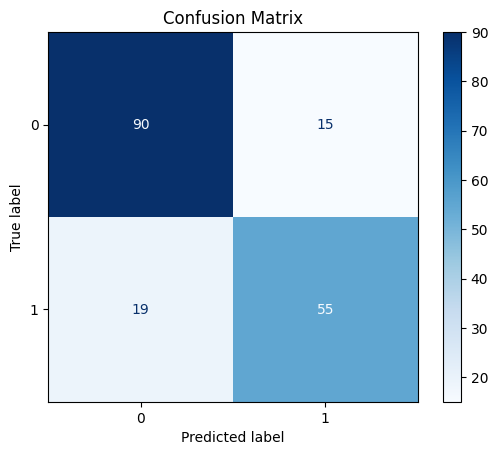

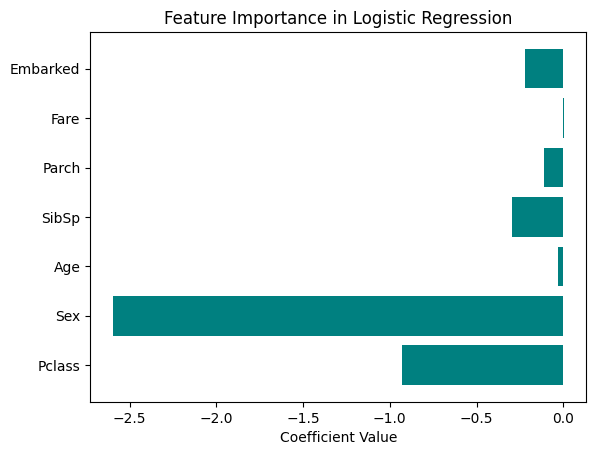

In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


df = pd.read_csv("Titanic-Dataset.csv")   # <-- use your file path
print("Dataset shape:", df.shape)
print(df.head())


features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

X = df[features].copy()
y = df["Survived"]
num_imputer = SimpleImputer(strategy="median")
X[["Age", "Fare"]] = num_imputer.fit_transform(X[["Age", "Fare"]])

cat_imputer = SimpleImputer(strategy="most_frequent")
X[["Embarked"]] = cat_imputer.fit_transform(X[["Embarked"]])
label_enc = LabelEncoder()
X["Sex"] = label_enc.fit_transform(X["Sex"].astype(str))
X["Embarked"] = label_enc.fit_transform(X["Embarked"].astype(str))
print(X.dtypes)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x="Survived", palette="Set2")
plt.title("Survival Count")
plt.show()

sns.histplot(data=df, x="Age", hue="Survived", multiple="stack", bins=30, kde=True, palette="coolwarm")
plt.title("Age Distribution by Survival")
plt.show()

from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

import numpy as np

coefficients = model.coef_[0]
features = X.columns

plt.barh(features, coefficients, color="teal")
plt.xlabel("Coefficient Value")
plt.title("Feature Importance in Logistic Regression")
plt.show()


In [75]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


Stock price forecasting using historical market data.

C:\Program Files\KMSpico\temp\ipykernel_2240\2284787431.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('AAPL', start='2020-01-01', end='2023-01-01')
[*********************100%***********************]  1 of 1 completed


Sample predictions (first 5): [[167.7026883 ]
 [166.30878699]
 [164.48086843]
 [164.38544618]
 [165.08067249]]
Mean Squared Error on test set: 12.7471


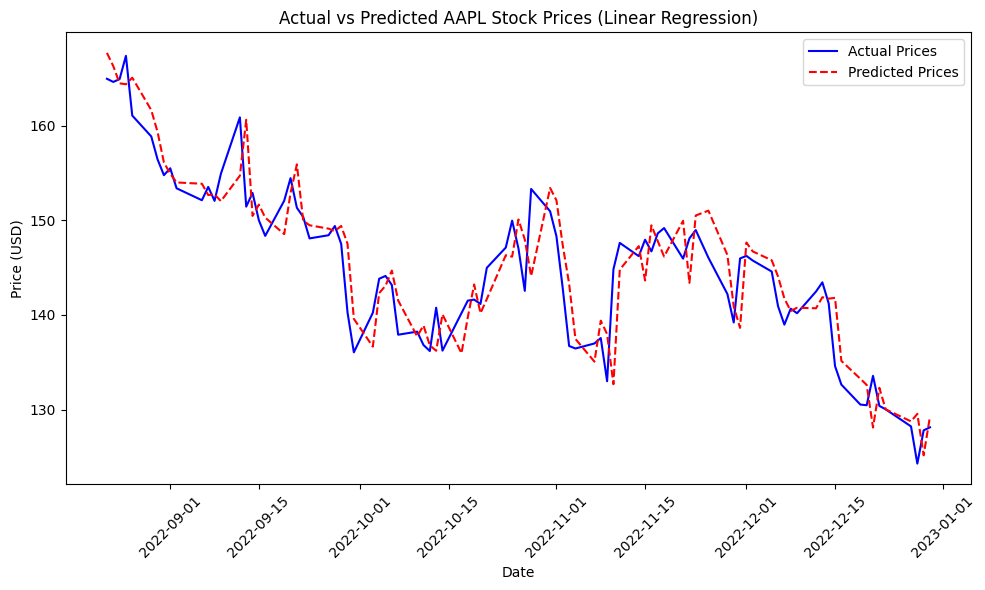

In [76]:
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Download data (AAPL as example)
data = yf.download('AAPL', start='2020-01-01', end='2023-01-01')
close_prices = data['Close'].values.reshape(-1, 1)
dates = data.index  # Get dates for plotting

# Preprocess
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(close_prices)
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]
test_dates = dates[train_size + 60:]  # Adjust for sequence length

def create_sequences(data, seq_length=60):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length].flatten())  # Flatten sequence for regression
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Create sequences
X_train, y_train = create_sequences(train_data)
X_test, y_test = create_sequences(test_data)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train.ravel()) 

# Test
y_pred = model.predict(X_test)

# Inverse transform predictions and actual values
y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Print sample predictions
print("Sample predictions (first 5):", y_pred_inv[:5])

# Evaluate model
mse = mean_squared_error(y_test_inv, y_pred_inv)
print(f"Mean Squared Error on test set: {mse:.4f}")

# Visualization: Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(test_dates, y_test_inv, label='Actual Prices', color='blue')
plt.plot(test_dates, y_pred_inv, label='Predicted Prices', color='red', linestyle='--')
plt.title('Actual vs Predicted AAPL Stock Prices (Linear Regression)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('stock_price_prediction.png')
plt.show()
plt.close()

Predicting temperature, precipitation, and other weather metrics based on meteorological data.


RMSE: 0.95


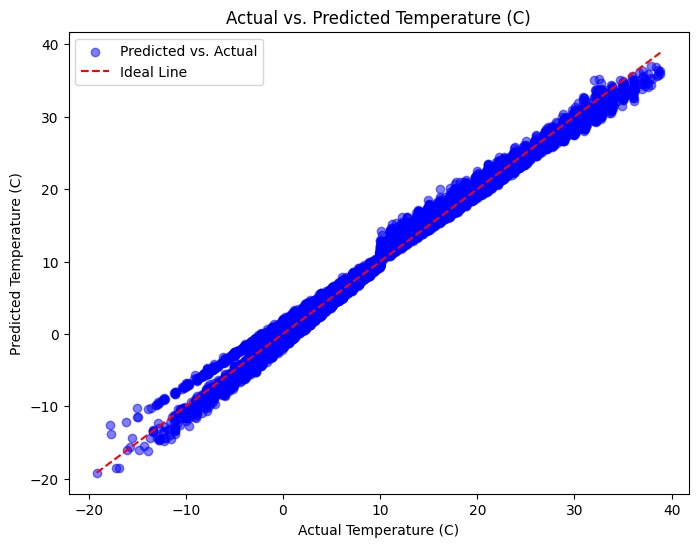


Feature Coefficients:
                    Feature  Coefficient
0  Apparent Temperature (C)     0.872360
1                  Humidity    -1.438081
2         Wind Speed (km/h)     0.079216
3           Visibility (km)     0.007748


In [77]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load dataset (assuming mm.csv contains meteorological data)
df = pd.read_csv('mm.csv')
df = df[['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Visibility (km)']]  # Select features
df.dropna(inplace=True)

# Prepare data
X = df.drop('Temperature (C)', axis=1)
y = df['Temperature (C)']

# Split and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")

# Visualization: Actual vs. Predicted Temperatures
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predicted vs. Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Line')
plt.title('Actual vs. Predicted Temperature (C)')
plt.xlabel('Actual Temperature (C)')
plt.ylabel('Predicted Temperature (C)')
plt.legend()
plt.savefig('temperature_prediction.png')
plt.show()

# Optional: Feature importance (coefficients)
coeff_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': reg.coef_})
print("\nFeature Coefficients:")
print(coeff_df)

Classifying patient data to predict the presence of a disease, such as a tumor being malignant or benign.


Accuracy on PCA-transformed test set: 0.9912


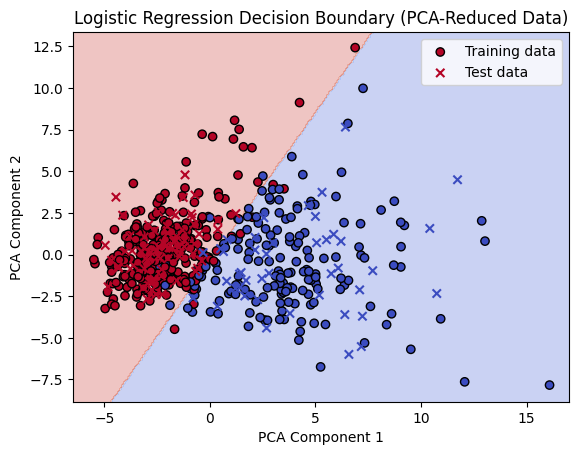

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for PCA)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train logistic regression on the 2D PCA-transformed data
clf = LogisticRegression(max_iter=10000, random_state=42)
clf.fit(X_train_pca, y_train)

# Predict and evaluate on test set
y_pred = clf.predict(X_test_pca)
print(f"Accuracy on PCA-transformed test set: {accuracy_score(y_test, y_pred):.4f}")


# Create a mesh grid for plotting decision boundary
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict on mesh grid to plot decision boundary
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and data points
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolors='k', cmap='coolwarm', label='Training data')
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, marker='x', cmap='coolwarm', label='Test data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Logistic Regression Decision Boundary (PCA-Reduced Data)')
plt.legend()
plt.savefig('Patient.png')
plt.show()
plt.close()

Learn a robot to navigate a maze or an environment with obstacles to reach a goal. 

In [ ]:
import numpy as np

# Define maze (0: free, 1: obstacle, 2: goal)
maze = np.array([
    [0, 0, 1, 0],
    [0, 1, 0, 0],
    [0, 0, 0, 1],
    [1, 0, 0, 2]
])
states = maze.shape[0] * maze.shape[1]
actions = 4  # up, down, left, right
Q = np.zeros((states, actions))

# Helper functions
def state_to_xy(state):
    return state // maze.shape[1], state % maze.shape[1]

def xy_to_state(x, y):
    return x * maze.shape[1] + y

def get_next_state(state, action):
    x, y = state_to_xy(state)
    if action == 0: x -= 1  # up
    elif action == 1: x += 1  # down
    elif action == 2: y -= 1  # left
    elif action == 3: y += 1  # right
    if 0 <= x < maze.shape[0] and 0 <= y < maze.shape[1] and maze[x, y] != 1:
        return xy_to_state(x, y)
    return state

# Train Q-Learning
episodes = 1000
alpha, gamma, epsilon = 0.1, 0.9, 0.1
for _ in range(episodes):
    state = 0  # start at (0,0)
    while maze[state_to_xy(state)] != 2:
        if np.random.rand() < epsilon:
            action = np.random.randint(actions)
        else:
            action = np.argmax(Q[state])
        next_state = get_next_state(state, action)
        reward = 1 if maze[state_to_xy(next_state)] == 2 else -0.1
        Q[state, action] += alpha * (reward + gamma * np.max(Q[next_state]) - Q[state, action])
        state = next_state

print("Q-Table:", Q)

Q-Table: [[ 0.03890162  0.18098     0.03444201 -0.1147923 ]
 [-0.25789515 -0.26100996  0.04062879 -0.26027975]
 [ 0.          0.          0.          0.        ]
 [-0.029701   -0.03860209 -0.029701   -0.029701  ]
 [ 0.04618134  0.3122      0.1741288   0.16153936]
 [ 0.          0.          0.          0.        ]
 [-0.02881     0.58098077  0.00663509 -0.03772   ]
 [-0.036991   -0.03940399  0.00656629 -0.03940399]
 [ 0.1382147   0.30436139  0.28801472  0.458     ]
 [ 0.42353173  0.56548178  0.29187405  0.62      ]
 [ 0.32402019  0.8         0.41490065  0.59196656]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.018413    0.08107445  0.04274328  0.7975045 ]
 [ 0.59210882  0.76562919  0.52111218  1.        ]
 [ 0.          0.          0.          0.        ]]


Grouping customers with similar traits or purchasing behaviors to create target marketing strategies.

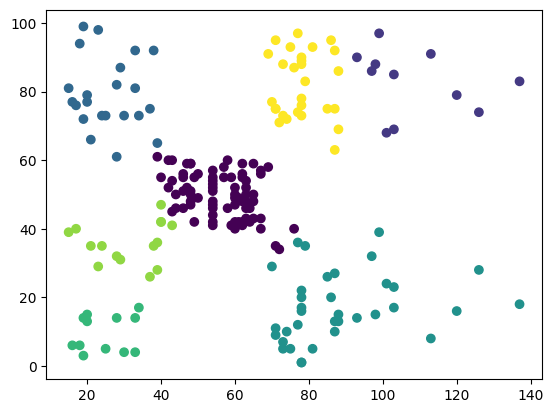

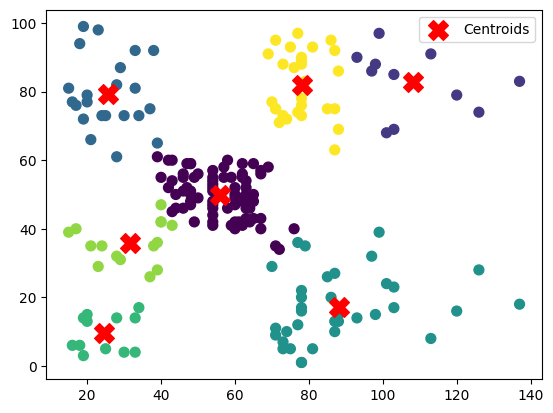

         Annual Income (k$)  Spending Score (1-100)  Count
Cluster                                                   
0                 56.051948               49.857143     77
1                108.181818               82.727273     11
2                 25.727273               79.363636     22
3                 88.200000               17.114286     35
4                 24.583333                9.583333     12
5                 31.533333               35.866667     15
6                 78.035714               81.892857     28


In [80]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
df = pd.read_csv('Mall_Customers.csv')
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(X_scaled)
df['Cluster'] = kmeans.labels_

plt.scatter(X['Annual Income (k$)'], 
            X['Spending Score (1-100)'], 
            c=df['Cluster'])
plt.savefig('marketing_clusters.png')
plt.show()

centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=df['Cluster'], cmap="viridis", s=50)
plt.scatter(centers[:,0], centers[:,1], c="red", marker="X", s=200, label="Centroids")
plt.legend()
plt.show()

# Cluster profiling: mean values for each cluster
cluster_profile = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
cluster_profile['Count'] = df['Cluster'].value_counts().sort_index()

print(cluster_profile)
